Tespit edilen eğim açısı: -2.00 derece
Düzeltilmiş görsel kaydedildi: deskewed_output.jpg


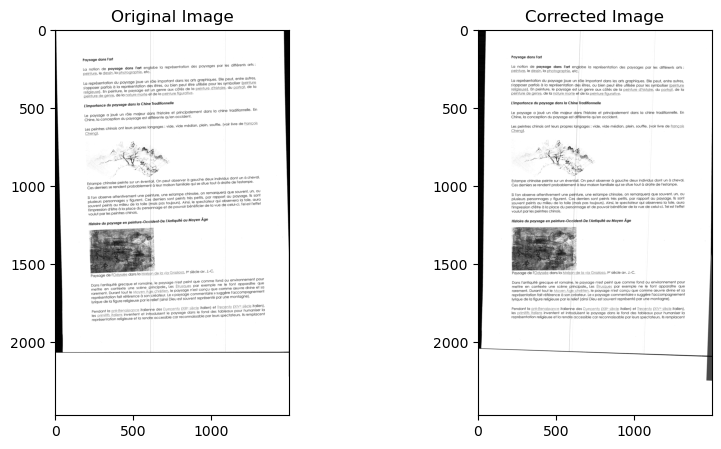

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deskew import determine_skew

class Deskewer:
    def __init__(self, image_path):
        self.image_path = image_path
        self.image = self._load_image()
        self.angle = None
    
    def _load_image(self):
        image = cv2.imread(self.image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError("Görsel yüklenemedi. Lütfen doğru bir dosya yolu belirtin.")
        return image
    
    def calculate_skew_angle(self):
        self.angle = determine_skew(self.image)
        return self.angle
    
    def rotate_image(self):
        if self.angle is None:
            raise ValueError("Eğim açısı hesaplanmadan görüntü döndürülemez.")
        
        (h, w) = self.image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, self.angle, 1.0)
        rotated = cv2.warpAffine(self.image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
        return rotated
    
    def save_corrected_image(self, output_path):
        corrected_image = self.rotate_image()
        cv2.imwrite(output_path, corrected_image)
        print(f"Düzeltilmiş görsel kaydedildi: {output_path}")
    
    def display_images(self):
        corrected_image = self.rotate_image()
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(self.image, cmap='gray')
        axes[0].set_title('Original Image')
        axes[1].imshow(corrected_image, cmap='gray')
        axes[1].set_title('Corrected Image')
        plt.show()

if __name__ == "__main__":
    input_path = "deskew.jpg"
    output_path = "deskewed_output.jpg"
    
    deskewer = Deskewer(input_path)
    angle = deskewer.calculate_skew_angle()
    print(f"Tespit edilen eğim açısı: {angle:.2f} derece")
    deskewer.save_corrected_image(output_path)
    deskewer.display_images()